<a href="https://colab.research.google.com/github/DASIREDDYCHAITANYA/Slooze__challenge/blob/main/slooze_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * ----- Preprocessing------*

In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/slooze_challenge/SalesFINAL12312016.csv')
df

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2/12/2016,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2/13/2016,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2/19/2016,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2/22/2016,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE


In [4]:
df.columns = (
    df.columns
      .str.strip()
      .str.replace(" ", "_")
      .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
      .str.lower()
)

In [7]:
print("Shape:", df.shape)
print("\nDuplicate rows:", df.duplicated().sum())
print("\nNulls per column:\n", df.isna().sum())

Shape: (1048575, 14)

Duplicate rows: 0

Nulls per column:
 inventoryid       0
store             0
brand             0
description       0
size              0
salesquantity     0
salesdollars      0
salesprice        0
salesdate         0
volume            0
classification    0
excisetax         0
vendorno          0
vendorname        0
dtype: int64


In [8]:
cat_cols = ["inventoryid", "brand", "description", "size",
            "classification", "vendorno", "vendorname"]
for col in cat_cols:
    df[col] = df[col].astype("category")

In [11]:
# -------------------------------------------------------------
# Convert 'salesdate' to datetime objects
df['salesdate'] = pd.to_datetime(df['salesdate'])

df["sales_year"]  = df["salesdate"].dt.year.astype("int16")
df["sales_month"] = df["salesdate"].dt.to_period("M")
df["sales_week"]  = df["salesdate"].dt.isocalendar().week.astype("int16")

In [13]:
df["litres_sold"] = (df["volume"] / 1000) * df["salesquantity"]


In [14]:
df

,inventoryid,store,brand,description,size,salesquantity,salesdollars,salesprice,salesdate,volume,classification,excisetax,vendorno,vendorname,sales_year,sales_month,sales_week,litres_sold
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,53,0.75
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,53,1.50
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,53,0.75
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,1,0.75
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,1,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2016-02-12,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE,2016,2016-02,6,3.00
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2016-02-13,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE,2016,2016-02,6,6.00
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2016-02-19,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE,2016,2016-02,7,0.75
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2016-02-22,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE,2016,2016-02,8,2.25


In [15]:
print("\nPost-clean info:")
df.info(show_counts=True)


Post-clean info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   inventoryid     1048575 non-null  category      
 1   store           1048575 non-null  int64         
 2   brand           1048575 non-null  category      
 3   description     1048575 non-null  category      
 4   size            1048575 non-null  category      
 5   salesquantity   1048575 non-null  int64         
 6   salesdollars    1048575 non-null  float64       
 7   salesprice      1048575 non-null  float64       
 8   salesdate       1048575 non-null  datetime64[ns]
 9   volume          1048575 non-null  int64         
 10  classification  1048575 non-null  category      
 11  excisetax       1048575 non-null  float64       
 12  vendorno        1048575 non-null  category      
 13  vendorname      1048575 non-null  category      
 14  

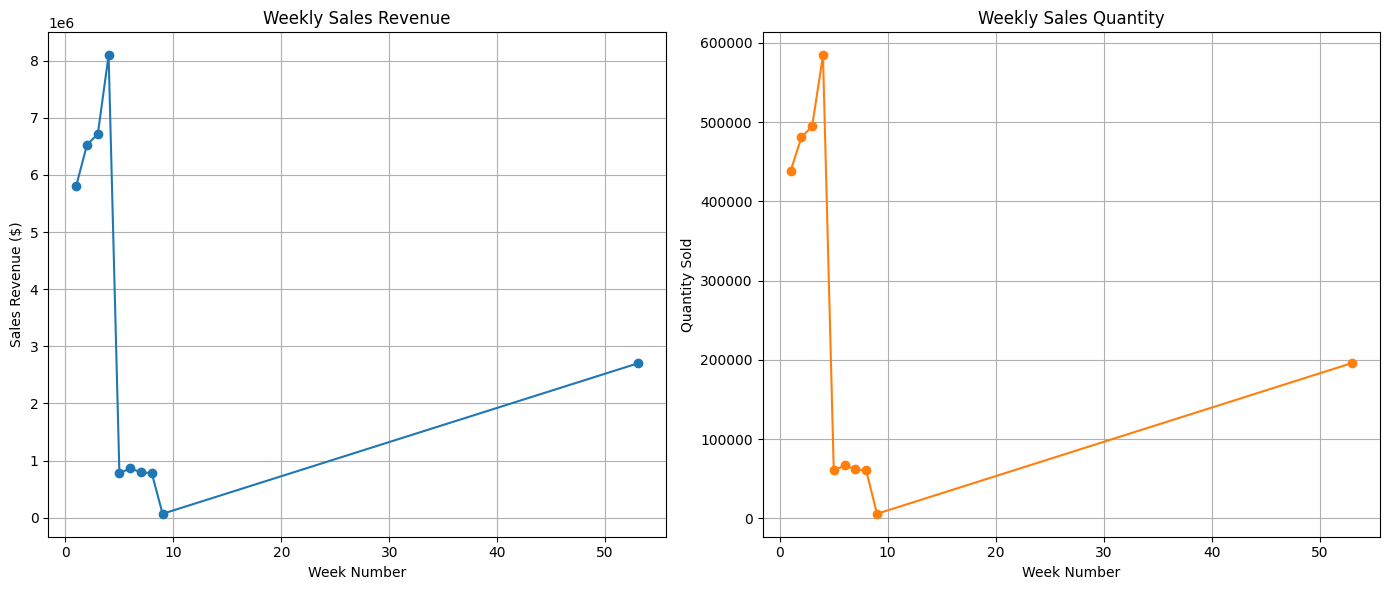

In [20]:
import matplotlib.pyplot as plt

# Aggregate weekly sales revenue and quantity
weekly_sales = df.groupby('sales_week').agg({
    'salesdollars': 'sum',
    'salesquantity': 'sum'
}).reset_index()

plt.figure(figsize=(14,6))

# Plot sales revenue
plt.subplot(1, 2, 1)
plt.plot(weekly_sales['sales_week'], weekly_sales['salesdollars'], marker='o', color='tab:blue')
plt.title('Weekly Sales Revenue')
plt.xlabel('Week Number')
plt.ylabel('Sales Revenue ($)')
plt.grid(True)

# Plot sales quantity
plt.subplot(1, 2, 2)
plt.plot(weekly_sales['sales_week'], weekly_sales['salesquantity'], marker='o', color='tab:orange')
plt.title('Weekly Sales Quantity')
plt.xlabel('Week Number')
plt.ylabel('Quantity Sold')
plt.grid(True)

plt.tight_layout()
plt.show()


# 1️⃣ **Demand** **Forecasting**

In [25]:
print(df['brand'].unique()[:10])         # Show first 10 brands
# print(df['inventoryid'].unique()[:10])   # Show first 10 inventory IDs


[1004, 1005, 10058, 1006, 10062, 1009, 1012, 1013, 1019, 1020]
Categories (7658, int64): [58, 60, 61, 62, ..., 90085, 90086, 90087, 90089]


In [28]:
print(df[df['brand'] == '1009'])

Empty DataFrame
Columns: [inventoryid, store, brand, description, size, salesquantity, salesdollars, salesprice, salesdate, volume, classification, excisetax, vendorno, vendorname, sales_year, sales_month, sales_week, litres_sold]
Index: []


In [29]:
print(df['brand'].dtype)   # should be some numeric or categorical type
print(df['brand'].head(10))
print(df['brand'].unique()[:20])  # first 20 unique values


category
0     1004
1     1004
2     1004
3     1004
4     1005
5     1005
6     1005
7     1005
8    10058
9    10058
Name: brand, dtype: category
Categories (7658, int64): [58, 60, 61, 62, ..., 90085, 90086, 90087, 90089]
[1004, 1005, 10058, 1006, 10062, ..., 1024, 10254, 10264, 10266, 1029]
Length: 20
Categories (7658, int64): [58, 60, 61, 62, ..., 90085, 90086, 90087, 90089]


In [30]:
product_id = 1004

product_sales = df[df['brand'] == product_id]

print("Number of rows for brand 1004:", product_sales.shape[0])
print(product_sales.head())


Number of rows for brand 1004: 23
               inventoryid  store brand                 description   size  \
0      1_HARDERSFIELD_1004      1  1004  Jim Beam w/2 Rocks Glasses  750mL   
1      1_HARDERSFIELD_1004      1  1004  Jim Beam w/2 Rocks Glasses  750mL   
2      1_HARDERSFIELD_1004      1  1004  Jim Beam w/2 Rocks Glasses  750mL   
3      1_HARDERSFIELD_1004      1  1004  Jim Beam w/2 Rocks Glasses  750mL   
74486     15_WANBORNE_1004     15  1004  Jim Beam w/2 Rocks Glasses  750mL   

       salesquantity  salesdollars  salesprice  salesdate  volume  \
0                  1         16.49       16.49 2016-01-01     750   
1                  2         32.98       16.49 2016-01-02     750   
2                  1         16.49       16.49 2016-01-03     750   
3                  1         14.49       14.49 2016-01-08     750   
74486              6         86.94       14.49 2016-01-29     750   

      classification  excisetax vendorno                   vendorname  \
0        

In [31]:
product_sales

,inventoryid,store,brand,description,size,salesquantity,salesdollars,salesprice,salesdate,volume,classification,excisetax,vendorno,vendorname,sales_year,sales_month,sales_week,litres_sold
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,53,0.75
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,53,1.50
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,53,0.75
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,1,0.75
74486,15_WANBORNE_1004,15,1004,Jim Beam w/2 Rocks Glasses,750mL,6,86.94,14.49,2016-01-29,750,1,4.72,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,4,4.50
200422,27_MOUNTMEND_1004,27,1004,Jim Beam w/2 Rocks Glasses,750mL,6,86.94,14.49,2016-01-29,750,1,4.72,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,4,4.50
355143,4_EANVERNESS_1004,4,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-29,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,4,0.75
432493,49_GARIGILL_1004,49,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-29,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,4,0.75
632995,64_CESTERFIELD_1004,64,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-29,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,4,0.75
650305,66_EANVERNESS_1004,66,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-16,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,2016,2016-01,2,0.75


In [32]:
# Aggregate weekly sales quantity by sales_year and sales_week
weekly_sales = (
    product_sales
    .groupby(['sales_year', 'sales_week'])['salesquantity']
    .sum()
    .reset_index()
)

# Convert year + week number to datetime (Monday of that week)
weekly_sales['ds'] = pd.to_datetime(
    weekly_sales['sales_year'].astype(str) + '-' + weekly_sales['sales_week'].astype(str) + '-1',
    format='%G-%V-%u'
)

weekly_sales.rename(columns={'salesquantity': 'y'}, inplace=True)

# Sort by date and keep only necessary columns
weekly_sales = weekly_sales.sort_values('ds')[['ds', 'y']]

print(weekly_sales.head())


          ds   y
0 2016-01-04   3
1 2016-01-11   1
2 2016-01-18   2
3 2016-01-25  19
4 2016-02-08   6


In [33]:
!pip install prophet


In [34]:
from prophet import Prophet
import matplotlib.pyplot as plt

model = Prophet(weekly_seasonality=True)  # Enable weekly seasonality explicitly
model.fit(weekly_sales)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvmze8l2u/288lskm7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvmze8l2u/xnxsq239.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57246', 'data', 'file=/tmp/tmpvmze8l2u/288lskm7.json', 'init=/tmp/tmpvmze8l2u/xnxsq239.json', 'output', 'file=/tmp/tmpvmze8l2u/prophet_modelciqtuc_7/prophet_model-20250531034913.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:49:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:49:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [35]:
future = model.make_future_dataframe(periods=12, freq='W-MON')  # weekly frequency on Mondays
forecast = model.predict(future)


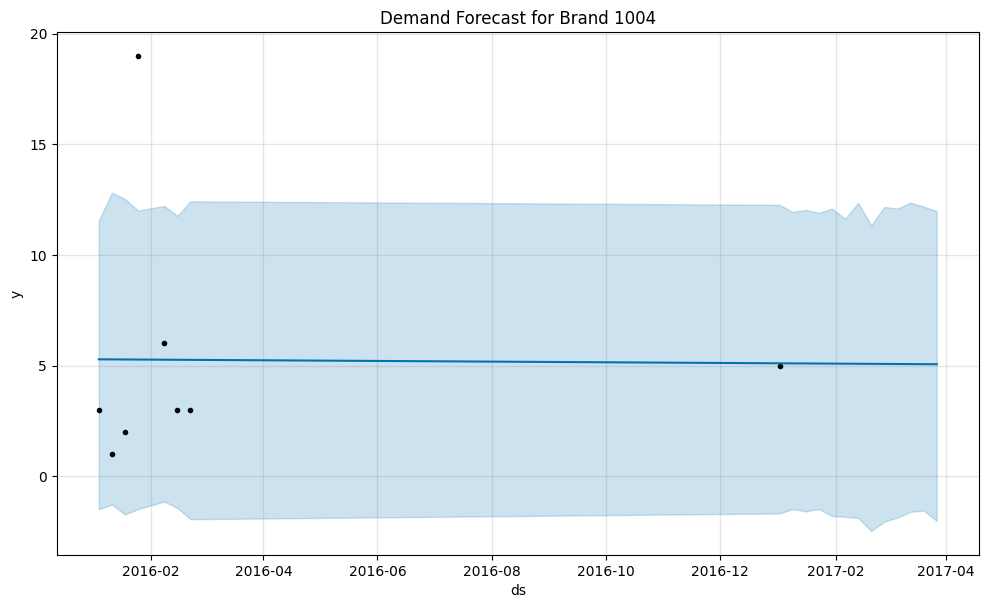

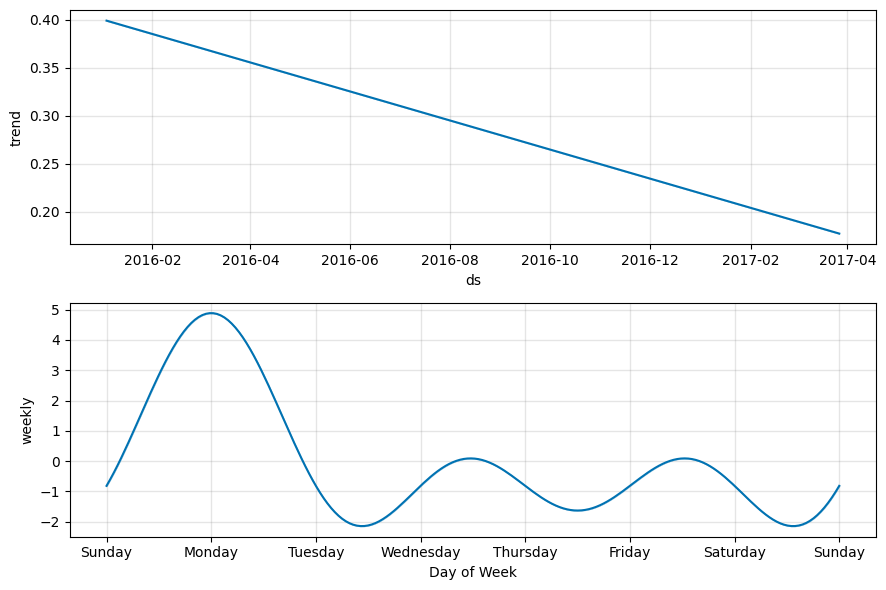

In [36]:
fig1 = model.plot(forecast)
plt.title(f"Demand Forecast for Brand {product_id}")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()


In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,0.399302,-1.493740,11.548184,0.399302,0.399302,4.885163,4.885163,4.885163,4.885163,4.885163,4.885163,0.0,0.0,0.0,5.284465
1,2016-01-11,0.395831,-1.278651,12.816988,0.395831,0.395831,4.885163,4.885163,4.885163,4.885163,4.885163,4.885163,0.0,0.0,0.0,5.280993
2,2016-01-18,0.392359,-1.727868,12.530266,0.392359,0.392359,4.885163,4.885163,4.885163,4.885163,4.885163,4.885163,0.0,0.0,0.0,5.277522
3,2016-01-25,0.388888,-1.480499,12.006163,0.388888,0.388888,4.885163,4.885163,4.885163,4.885163,4.885163,4.885163,0.0,0.0,0.0,5.274050
4,2016-02-08,0.381945,-1.145252,12.218608,0.381945,0.381945,4.885163,4.885163,4.885163,4.885163,4.885163,4.885163,0.0,0.0,0.0,5.267108
5,2016-02-15,0.378474,-1.433418,11.769055,0.378474,0.378474,4.885163,4.885163,4.885163,4.885163,4.885163,4.885163,0.0,0.0,0.0,5.263636
6,2016-02-22,0.375002,-1.941595,12.422789,0.375002,0.375002,4.885163,4.885163,4.885163,4.885163,4.885163,4.885163,0.0,0.0,0.0,5.260165
7,2017-01-02,0.218790,-1.681642,12.266241,0.218790,0.218790,4.885163,4.885163,4.885163,4.885163,4.885163,4.885163,0.0,0.0,0.0,5.103953
8,2017-01-09,0.215319,-1.482870,11.943549,0.215319,0.215319,4.885163,4.885163,4.885163,4.885163,4.885163,4.885163,0.0,0.0,0.0,5.100481
9,2017-01-16,0.211847,-1.587519,12.037676,0.211847,0.211847,4.885163,4.885163,4.885163,4.885163,4.885163,4.885163,0.0,0.0,0.0,5.097010


# ***2️⃣ ABC Analysis***

In [38]:
abc_data = df.groupby('inventoryid')['salesdollars'].sum().reset_index()
abc_data = abc_data.rename(columns={'salesdollars': 'total_sales_value'})


<ipython-input-38-b3428d3e00f4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abc_data = df.groupby('inventoryid')['salesdollars'].sum().reset_index()


In [39]:
abc_data = abc_data.sort_values('total_sales_value', ascending=False)


In [50]:
abc_data['cumulative_sales_value'] = abc_data['total_sales_value'].cumsum()
total_value = abc_data['total_sales_value'].sum()
abc_data['cumulative_pct'] = abc_data['cumulative_sales_value'] / total_value * 100


In [51]:
def classify_abc(cum_pct):
    if cum_pct <= 80:
        return 'A'   # High-value, critical items (top 80%)
    elif cum_pct <= 95:
        return 'B'   # Moderate-value items (next 15%)
    else:
        return 'C'   # Low-value items (remaining 5%)

# Step 5: Apply classification
abc_data['ABC_class'] = abc_data['cumulative_pct'].apply(classify_abc)

# Check the result
print(abc_data.head(20))
print(abc_data['ABC_class'].value_counts())

                     description  total_sales_value  cumulative_sales_value  \
0                         (RI) 1            1470.60                 1470.60   
1            10 Span Cab Svgn CC             179.76                 1650.36   
2               10 Span Chard CC             629.16                 2279.52   
3              10 Span Pnt Nr CC             232.19                 2511.71   
4     12 Days of Pearls Gift Set             259.74                 2771.45   
5             13 Celsius Svgn Bl             782.86                 3554.31   
6   13th Colony Sthrn Corn Whsky             149.95                 3704.26   
7         14 Hands Cab Svgn Wash           23631.14                27335.40   
8            14 Hands Chard Wash            2993.04                30328.44   
9       14 Hands Hot to Trot Red           13372.71                43701.15   
10    14 Hands Hot to Trot White            1046.03                44747.18   
11          14 Hands Merlot Wash           12205.42 

In [52]:
print(abc_data['ABC_class'].value_counts())

ABC_class
A    5507
B     871
C     512
Name: count, dtype: int64


<ipython-input-55-d23262115d11>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=abc_counts.index, y=abc_counts.values, palette=['yellow', 'lightgreen', 'lightgrey'])


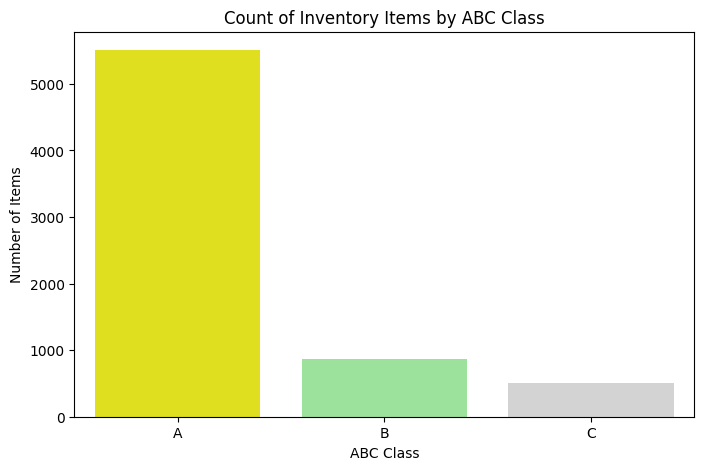

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count items per ABC class
abc_counts = abc_data['ABC_class'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=abc_counts.index, y=abc_counts.values, palette=['yellow', 'lightgreen', 'lightgrey'])
plt.title('Count of Inventory Items by ABC Class')
plt.xlabel('ABC Class')
plt.ylabel('Number of Items')
plt.show()


# **3️⃣ Economic Order Quantity (EOQ) Analysis**

In [56]:
# Aggregate total annual sales quantity for each product (e.g., by inventoryid)
annual_demand = df.groupby('inventoryid')['salesquantity'].sum().reset_index()
annual_demand = annual_demand.rename(columns={'salesquantity': 'D'})


<ipython-input-56-0435d3f32316>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_demand = df.groupby('inventoryid')['salesquantity'].sum().reset_index()


In [57]:
ordering_cost = 50  # $50 per order, example value
holding_cost_per_unit = 2  # $2 per unit per year, example value


In [58]:
# Assuming carrying cost = 20% of unit price (salesprice)
df['holding_cost'] = df['salesprice'] * 0.2
# Then average or median holding cost per inventoryid
holding_costs = df.groupby('inventoryid')['holding_cost'].mean().reset_index()
holding_costs = holding_costs.rename(columns={'holding_cost': 'H'})


<ipython-input-58-31035fbfdb15>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holding_costs = df.groupby('inventoryid')['holding_cost'].mean().reset_index()


In [59]:
eoq_data = annual_demand.merge(holding_costs, on='inventoryid', how='left')


In [60]:
import numpy as np

eoq_data['EOQ'] = np.sqrt((2 * eoq_data['D'] * ordering_cost) / eoq_data['H'])


In [61]:
print(eoq_data[['inventoryid', 'D', 'H', 'EOQ']].head(10))


        inventoryid   D       H        EOQ
0   10_HORNSEY_1000   1  3.3980   5.424857
1   10_HORNSEY_1001  11  1.1980  30.301766
2  10_HORNSEY_10030   2  1.9980  10.005004
3   10_HORNSEY_1005   6  6.9980   9.259524
4  10_HORNSEY_10057  12  2.5980  21.491714
5  10_HORNSEY_10058  32  2.6665  34.642099
6   10_HORNSEY_1006   1  0.7980  11.194342
7  10_HORNSEY_10062   6  1.7980  18.267570
8   10_HORNSEY_1009   3  9.9980   5.477773
9   10_HORNSEY_1012   2  6.9980   5.345989


# ***4️⃣ Reorder Point Analysis***

In [62]:
# Aggregate weekly sales quantity per product
weekly_demand = df.groupby(['inventoryid', 'sales_week'])['salesquantity'].sum().reset_index()

# Calculate average weekly demand per product
avg_weekly_demand = weekly_demand.groupby('inventoryid')['salesquantity'].mean().reset_index()
avg_weekly_demand = avg_weekly_demand.rename(columns={'salesquantity': 'avg_weekly_demand'})


<ipython-input-62-b7bbe8b6b9e7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_demand = df.groupby(['inventoryid', 'sales_week'])['salesquantity'].sum().reset_index()
<ipython-input-62-b7bbe8b6b9e7>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_weekly_demand = weekly_demand.groupby('inventoryid')['salesquantity'].mean().reset_index()


In [63]:
avg_lead_time_weeks = 2  # example, adjust if you have real data


In [64]:
import numpy as np

# Calculate std dev of weekly demand per product
std_weekly_demand = weekly_demand.groupby('inventoryid')['salesquantity'].std().reset_index()
std_weekly_demand = std_weekly_demand.rename(columns={'salesquantity': 'std_weekly_demand'})

# Merge avg demand and std dev
rop_data = avg_weekly_demand.merge(std_weekly_demand, on='inventoryid')

# Safety stock parameters
Z = 1.65  # 95% service level
L = avg_lead_time_weeks

# Calculate safety stock
rop_data['safety_stock'] = Z * rop_data['std_weekly_demand'] * np.sqrt(L)


<ipython-input-64-bf3cc434f70f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_weekly_demand = weekly_demand.groupby('inventoryid')['salesquantity'].std().reset_index()


In [65]:
rop_data['reorder_point'] = (rop_data['avg_weekly_demand'] * L) + rop_data['safety_stock']


In [66]:
print(rop_data[['inventoryid', 'avg_weekly_demand', 'std_weekly_demand', 'safety_stock', 'reorder_point']].head(10))


        inventoryid  avg_weekly_demand  std_weekly_demand  safety_stock  \
0   10_HORNSEY_1000                0.1           0.316228      0.737902   
1   10_HORNSEY_1001                1.1           2.846050      6.641122   
2  10_HORNSEY_10030                0.2           0.632456      1.475805   
3   10_HORNSEY_1005                0.6           0.699206      1.631564   
4  10_HORNSEY_10057                1.2           3.794733      8.854829   
5  10_HORNSEY_10058                3.2           3.489667      8.142972   
6   10_HORNSEY_1006                0.1           0.316228      0.737902   
7  10_HORNSEY_10062                0.6           1.349897      3.149921   
8   10_HORNSEY_1009                0.3           0.483046      1.127165   
9   10_HORNSEY_1012                0.2           0.421637      0.983870   

   reorder_point  
0       0.937902  
1       8.841122  
2       1.875805  
3       2.831564  
4      11.254829  
5      14.542972  
6       0.937902  
7       4.349921  
8  

# ***5️⃣ Lead Time Analysis***

In [69]:
f=pd.read_csv('/content/drive/MyDrive/slooze_challenge/PurchasesFINAL12312016.csv')
f

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372469,49_GARIGILL_22298,49,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2
2372470,1_HARDERSFIELD_19556,1,19556,Zorvino Bacca Z Blackberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-27,2017-01-09,2017-02-06,9.39,12,112.68,2
2372471,66_EANVERNESS_22297,66,22297,Zorvino Vyds Pearz,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,6.75,12,81.00,2
2372472,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,9.39,12,112.68,2


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert date columns to datetime
f['PODate'] = pd.to_datetime(f['PODate'])
f['ReceivingDate'] = pd.to_datetime(f['ReceivingDate'])

# Calculate lead time in days
f['lead_time_days'] = (f['ReceivingDate'] - f['PODate']).dt.days

# Summary stats by VendorName
lead_time_stats = f.groupby('VendorName')['lead_time_days'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()
lead_time_stats = lead_time_stats.rename(columns={'mean': 'avg_lead_time', 'std': 'std_lead_time', 'count': 'num_orders'})

print(lead_time_stats.head(10))



                        VendorName  avg_lead_time  std_lead_time  min  max  \
0      AAPER ALCOHOL & CHEMICAL CO      10.000000            NaN   10   10   
1      ADAMBA IMPORTS INTL INC           7.605431       2.116428    3   13   
2  ALISA CARR BEVERAGES                  6.809524       2.723003    3   12   
3      ALTAMAR BRANDS LLC                7.578947       2.427134    3   12   
4      AMERICAN SPIRITS EXCHANGE         8.250000       1.752549    5   11   
5      AMERICAN VINTAGE BEVERAGE         7.385036       2.061694    3   13   
6      APPOLO VINEYARDS LLC              7.444444       2.148111    5   12   
7      ATLANTIC IMPORTING COMPANY        8.101504       2.050549    3   13   
8      BACARDI USA INC                   7.700303       2.210198    3   14   
9      BANFI PRODUCTS CORP               7.472522       2.136339    3   14   

   num_orders  
0           1  
1         626  
2          63  
3          57  
4           8  
5        2192  
6          18  
7         266

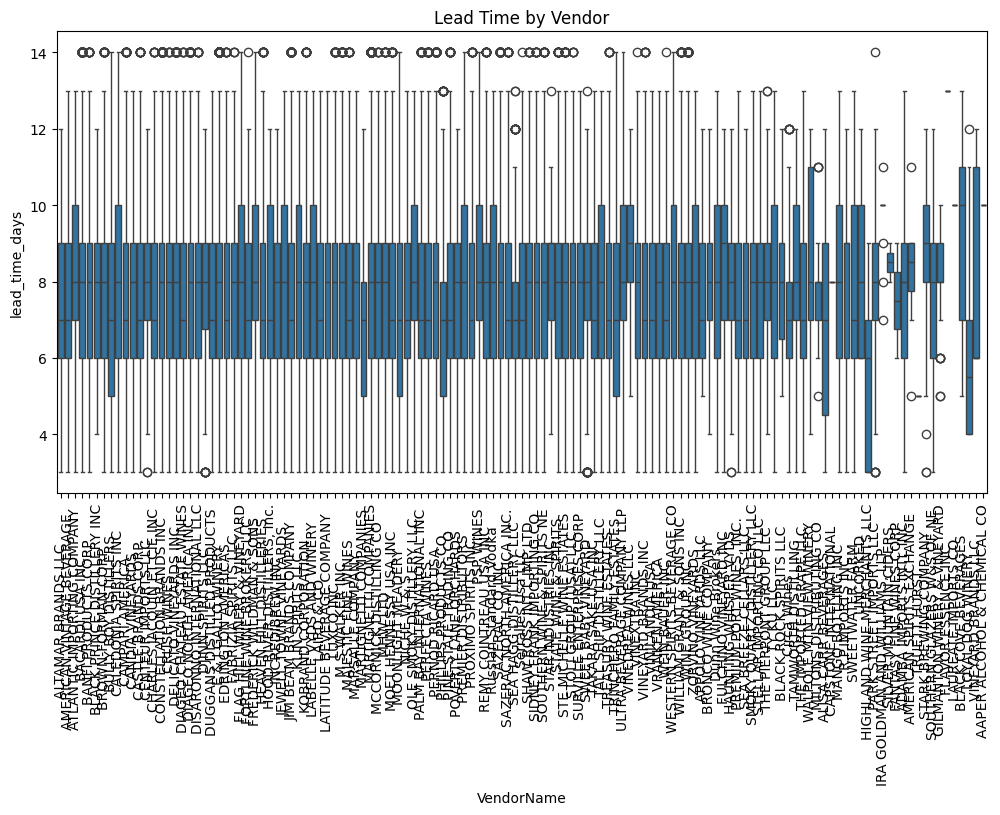

In [77]:

# Optional: visualize lead time by vendor
plt.figure(figsize=(12,6))
sns.boxplot(x='VendorName', y='lead_time_days', data=f)
plt.xticks(rotation=90)
plt.title('Lead Time by Vendor')
plt.show()